In [1]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [3]:
print (os.getcwd())

/home/dp_gcp/dsiot


Read the csv file and convert it into a timeseries format

In [19]:
dateparse = lambda dates: pd.datetime.strptime(dates, "%Y-%m")

In [20]:
homeA_df = pd.read_csv(os.getcwd()+"/HomeA/df_homeA_agg.csv", sep = ",", index_col = 'YrMo', date_parser = dateparse)

In [21]:
ts = homeA_df['avg_month_usage']

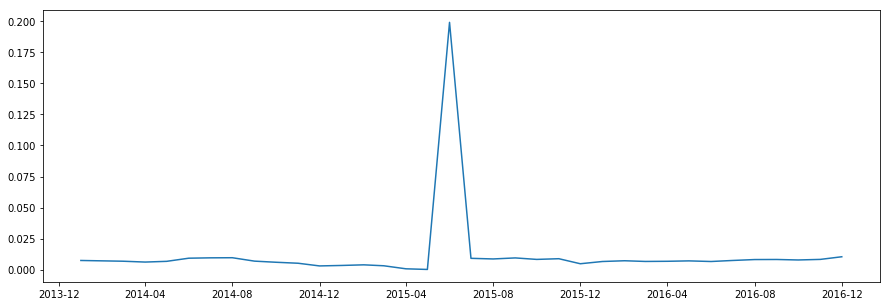

In [22]:
plt.plot(ts)

Checking Stationarity of Time Series

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def test_stationarity(time_series_set):
    
    roll_mean = pd.rolling_mean(time_series_set, window = 12)
    roll_std = pd.rolling_std(time_series_set, window = 12)
    
    orig = plt.plot(time_series_set, color = 'blue', label = 'Original')
    mean = plt.plot(roll_mean, color = 'red', label = "Rolling Mean")
    std = plt.plot(roll_std, color = 'black', label = "Rolling StdDev")
    plt.legend(loc = 'best')
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False) 
    
    print ("Dickey-Fuller Test:")

    df_test = adfuller(ts, autolag = 'AIC')
    df_out = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', "#lag used", "Num. of Obervations used"])
    
    for key, value in df_test[4].items():
        df_out["Critical Value: (%s)" %key] = value
    
    print (df_out)

/home/dp_gcp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()
/home/dp_gcp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


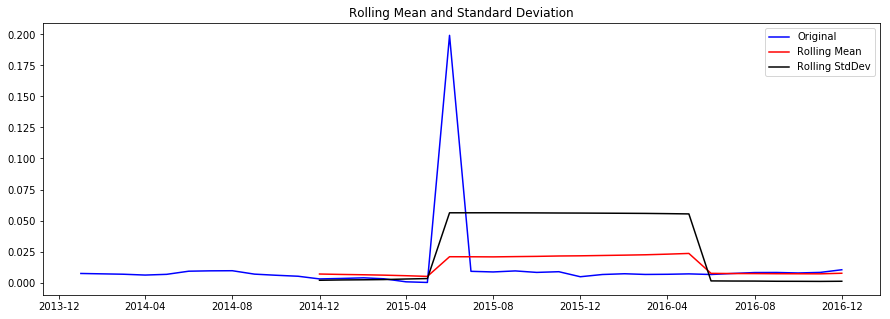

Dickey-Fuller Test:
Test Statistic             -6.019996e+00
p-value                     1.501680e-07
#lag used                   0.000000e+00
Num. of Obervations used    3.500000e+01
Critical Value: (5%)       -2.948510e+00
Critical Value: (10%)      -2.613017e+00
Critical Value: (1%)       -3.632743e+00
dtype: float64


In [25]:
test_stationarity(ts)

Estimating and Eliminating Trend

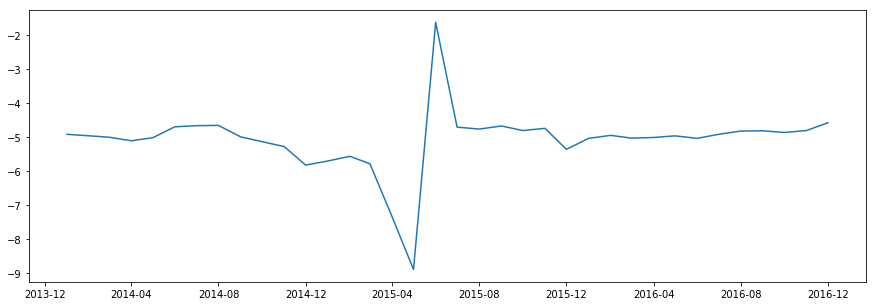

In [26]:
ts_log = np.log(ts)
plt.plot(ts_log)

1. Moving Average Technique to Eliminate Trend
2. Subtract the moving average from the original series

/home/dp_gcp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


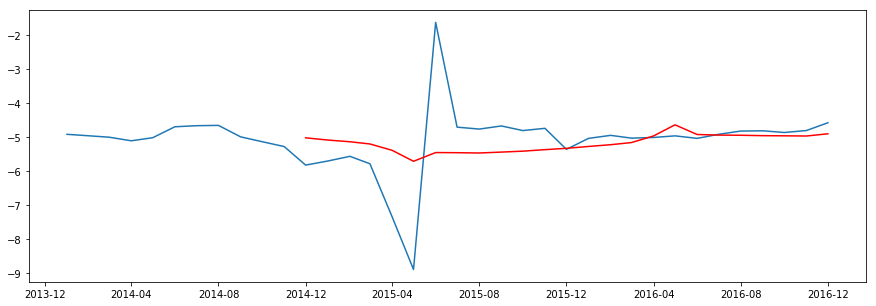

In [27]:
moving_avg = pd.rolling_mean(ts_log, 12)
plt.plot(ts_log)
plt.plot(moving_avg, color = 'red')

In [28]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(13)

YrMo
2014-01-01         NaN
2014-02-01         NaN
2014-03-01         NaN
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01         NaN
2014-11-01         NaN
2014-12-01   -0.803185
2015-01-01   -0.617553
Name: avg_month_usage, dtype: float64

/home/dp_gcp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()
/home/dp_gcp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


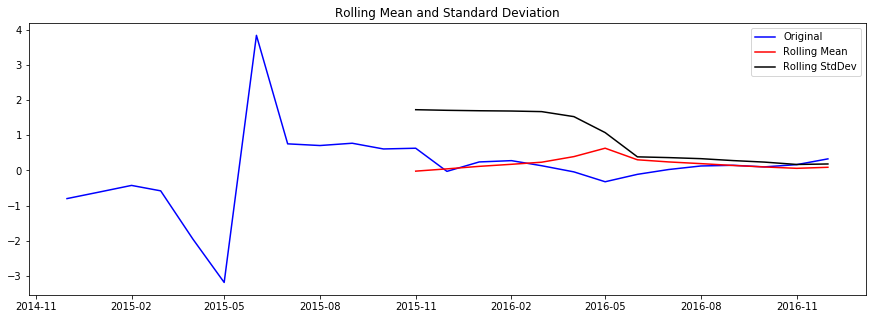

Dickey-Fuller Test:
Test Statistic             -6.019996e+00
p-value                     1.501680e-07
#lag used                   0.000000e+00
Num. of Obervations used    3.500000e+01
Critical Value: (5%)       -2.948510e+00
Critical Value: (10%)      -2.613017e+00
Critical Value: (1%)       -3.632743e+00
dtype: float64


In [30]:
ts_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(ts_log_moving_avg_diff)

Exponentially Weighted Moving Average Method

/home/dp_gcp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,halflife=12,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


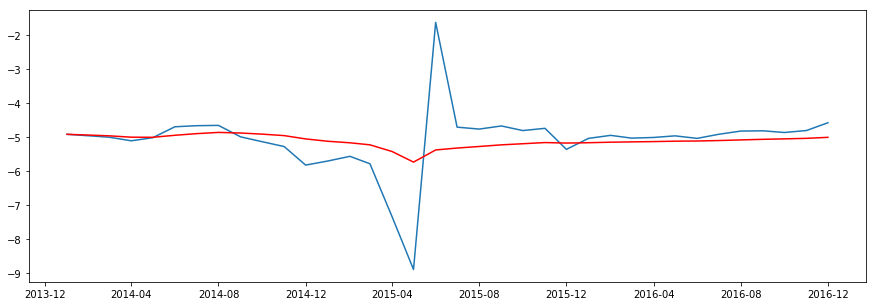

In [31]:
exp_weighted_avg = pd.ewma(ts_log, halflife = 12)
plt.plot(ts_log)
plt.plot(exp_weighted_avg, color = 'red')

/home/dp_gcp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()
/home/dp_gcp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


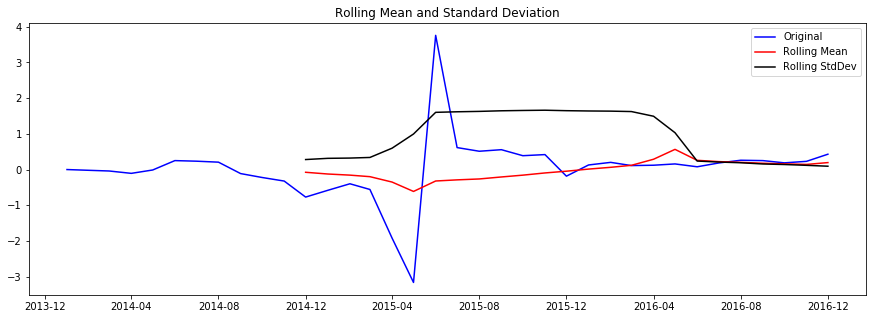

Dickey-Fuller Test:
Test Statistic             -6.019996e+00
p-value                     1.501680e-07
#lag used                   0.000000e+00
Num. of Obervations used    3.500000e+01
Critical Value: (5%)       -2.948510e+00
Critical Value: (10%)      -2.613017e+00
Critical Value: (1%)       -3.632743e+00
dtype: float64


In [32]:
ts_log_ewma_diff = ts_log - exp_weighted_avg
test_stationarity(ts_log_ewma_diff)

Eliminating Trend and Seasonality

1. Differencing 
2. Decompoisition

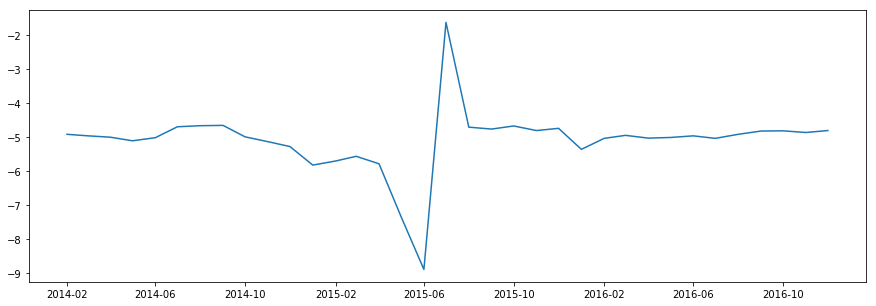

In [33]:
ts_log_diff = ts_log.shift()
plt.plot(ts_log_diff)

/home/dp_gcp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()
/home/dp_gcp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


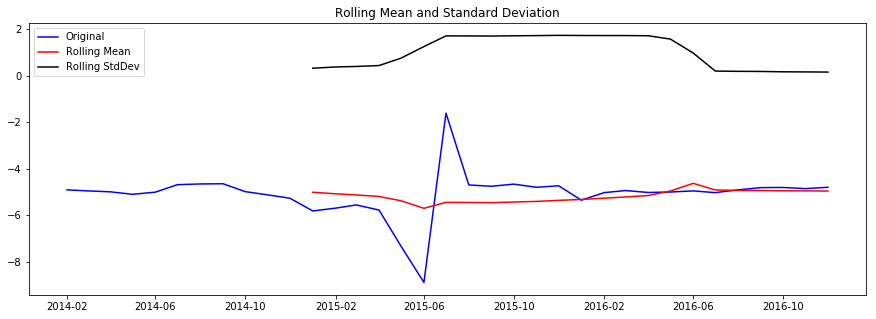

Dickey-Fuller Test:
Test Statistic             -6.019996e+00
p-value                     1.501680e-07
#lag used                   0.000000e+00
Num. of Obervations used    3.500000e+01
Critical Value: (5%)       -2.948510e+00
Critical Value: (10%)      -2.613017e+00
Critical Value: (1%)       -3.632743e+00
dtype: float64


In [34]:
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

2. Decomposing

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
decomposition = seasonal_decompose(ts_log)

# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid


# plt.subplot(411)
# plt.plot(ts_log, label = 'Original')
# plt.legend(loc = 'best')

# plt.subplot(412)
# plt.plot(trend, label = 'Trend')
# plt.legend(loc = 'best')

# plt.subplt(413)
# plt.plot(seasonal, label = 'Seasonal')
# plt.legend(loc = 'best')

# plt.subplot(414)
# plt.plot(residual, label = 'Residual')
# plt.legend(loc = 'best')

# plt.tight_layout()

TypeError: 'numpy.float64' object cannot be interpreted as an integer